<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_0_1_0_9_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n250.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-0.020074,198.752786,198.768238,-0.015452
1,0.0,1.0,57.329540,88.266135,33.974483,-0.078591,189.491568,189.586910,-0.095342
2,0.0,2.0,45.215694,22.043105,89.071799,0.408787,166.739385,166.306574,0.432811
3,0.0,3.0,69.375325,71.150993,24.742899,0.180426,175.449643,175.252510,0.197133
4,0.0,4.0,87.837297,47.725671,65.999025,-0.238211,211.323781,211.540749,-0.216968
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,68.510612,64.251694,32.630612,0.235145,175.628064,175.404181,0.223882
249996,999.0,246.0,39.659377,49.516890,65.602301,0.304739,165.083307,164.796213,0.287094
249997,999.0,247.0,85.998088,89.996742,83.110970,-0.018000,269.087800,269.203261,-0.115461
249998,999.0,248.0,51.290496,77.821258,33.797919,1.729657,174.639329,172.941410,1.697919


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-0.020074,198.752786,198.768238,-0.015452
1,0.0,1.0,57.329540,88.266135,33.974483,-0.078591,189.491568,189.586910,-0.095342
2,0.0,2.0,45.215694,22.043105,89.071799,0.408787,166.739385,166.306574,0.432811
3,0.0,3.0,69.375325,71.150993,24.742899,0.180426,175.449643,175.252510,0.197133
4,0.0,4.0,87.837297,47.725671,65.999025,-0.238211,211.323781,211.540749,-0.216968
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,68.510612,64.251694,32.630612,0.235145,175.628064,175.404181,0.223882
249996,999.0,246.0,39.659377,49.516890,65.602301,0.304739,165.083307,164.796213,0.287094
249997,999.0,247.0,85.998088,89.996742,83.110970,-0.018000,269.087800,269.203261,-0.115461
249998,999.0,248.0,51.290496,77.821258,33.797919,1.729657,174.639329,172.941410,1.697919


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  58.707153  61.211187  ...  198.752786  198.768238 -0.015452
      1.0    57.329540  88.266135  33.974483  ...  189.491568  189.586910 -0.095342
      2.0    45.215694  22.043105  89.071799  ...  166.739385  166.306574  0.432811
      3.0    69.375325  71.150993  24.742899  ...  175.449643  175.252510  0.197133
      4.0    87.837297  47.725671  65.999025  ...  211.323781  211.540749 -0.216968
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  68.510612  64.251694  32.630612  ...  175.628064  175.404181  0.223882
      246.0  39.659377  49.516890  65.602301  ...  165.083307  164.796213  0.287094
      247.0  85.998088  89.996742  83.110970  ...  269.087800  269.203261 -0.115461
      248.0  51.290496  77.821258  33.797919  ...  174.639329  172.941410  1.697919
      249.0  55.580270  50.527439  99.471624  ...  215.517347  215.630573 -0.113226

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  58.707153  61.211187  ...  198.752786  198.768238 -0.015452
      1.0    57.329540  88.266135  33.974483  ...  189.491568  189.586910 -0.095342
      2.0    45.215694  22.043105  89.071799  ...  166.739385  166.306574  0.432811
      3.0    69.375325  71.150993  24.742899  ...  175.449643  175.252510  0.197133
      4.0    87.837297  47.725671  65.999025  ...  211.323781  211.540749 -0.216968
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  68.510612  64.251694  32.630612  ...  175.628064  175.404181  0.223882
      246.0  39.659377  49.516890  65.602301  ...  165.083307  164.796213  0.287094
      247.0  85.998088  89.996742  83.110970  ...  269.087800  269.203261 -0.115461
      248.0  51.290496  77.821258  33.797919  ...  174.639329  172.941410  1.697919
      249.0  55.580270  50.527439  99.471624  ...  215.517347  215.630573 -0.113226

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-0.020074,198.752786,198.768238,-0.015452
1,0.0,1.0,57.329540,88.266135,33.974483,-0.078591,189.491568,189.586910,-0.095342
2,0.0,2.0,45.215694,22.043105,89.071799,0.408787,166.739385,166.306574,0.432811
3,0.0,3.0,69.375325,71.150993,24.742899,0.180426,175.449643,175.252510,0.197133
4,0.0,4.0,87.837297,47.725671,65.999025,-0.238211,211.323781,211.540749,-0.216968
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,68.510612,64.251694,32.630612,0.235145,175.628064,175.404181,0.223882
249996,999.0,246.0,39.659377,49.516890,65.602301,0.304739,165.083307,164.796213,0.287094
249997,999.0,247.0,85.998088,89.996742,83.110970,-0.018000,269.087800,269.203261,-0.115461
249998,999.0,248.0,51.290496,77.821258,33.797919,1.729657,174.639329,172.941410,1.697919


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  58.707153  61.211187  ...  198.752786  198.768238 -0.015452
      1.0    57.329540  88.266135  33.974483  ...  189.491568  189.586910 -0.095342
      2.0    45.215694  22.043105  89.071799  ...  166.739385  166.306574  0.432811
      3.0    69.375325  71.150993  24.742899  ...  175.449643  175.252510  0.197133
      4.0    87.837297  47.725671  65.999025  ...  211.323781  211.540749 -0.216968
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  68.510612  64.251694  32.630612  ...  175.628064  175.404181  0.223882
      246.0  39.659377  49.516890  65.602301  ...  165.083307  164.796213  0.287094
      247.0  85.998088  89.996742  83.110970  ...  269.087800  269.203261 -0.115461
      248.0  51.290496  77.821258  33.797919  ...  174.639329  172.941410  1.697919
      249.0  55.580270  50.527439  99.471624  ...  215.517347  215.630573 -0.113226

[250000 rows x 7 columns]

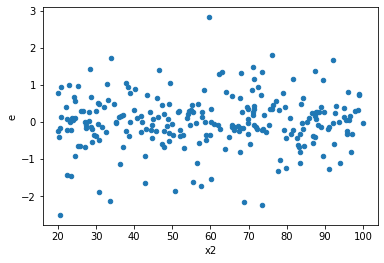

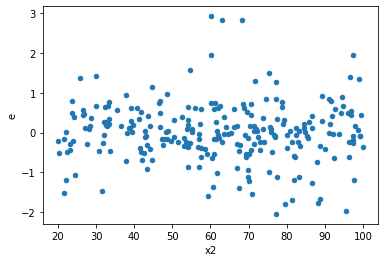

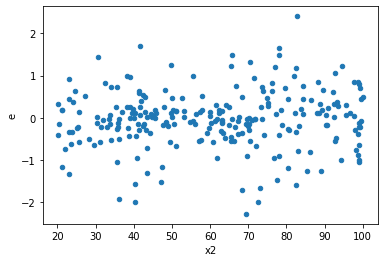

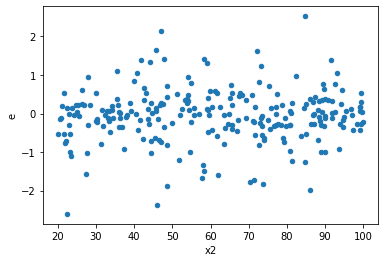

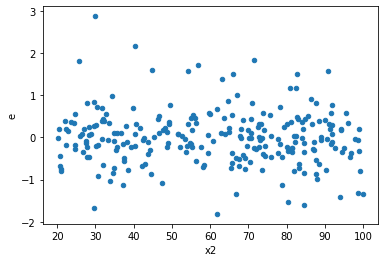

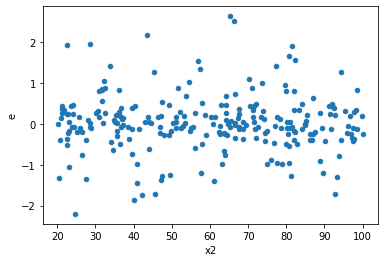

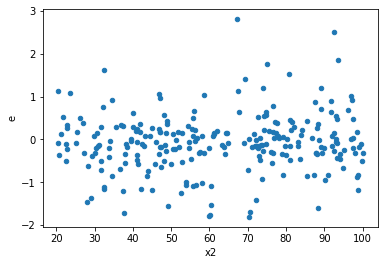

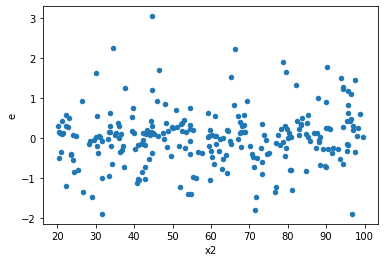

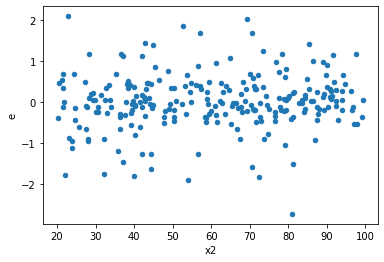

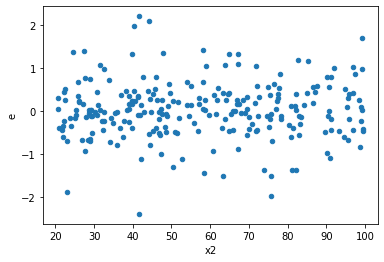

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,97.0,97.0,54.00177883937716,31.037608552298057,0.5625185295768454,0.3233084224197714,1.7398820772027173,0.006868153233512642,0.9965659233832437,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,55.58133140871998,40.27559521650168,0.5789722021741665,0.4195374501718925,1.3800250774679366,0.11440647304343643,0.9427967634782818,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,39.99866413244761,35.49059248536729,0.41665275137966257,0.3696936717225759,1.1270215944954707,0.5570927291441019,0.721453635427949,Reject001=1 : Homoscedasticity
12.0,97.0,97.0,55.316430266983495,41.968090804166394,0.576212815281078,0.4371676125433999,1.3180592494689307,0.17564343199752996,0.912178284001235,Reject001=1 : Homoscedasticity
14.0,97.0,97.0,56.7744368271611,39.01931815126147,0.5914003836162615,0.406451230742307,1.4550340579266532,0.06625268279716967,0.9668736586014152,Reject001=1 : Homoscedasticity
15.0,97.0,97.0,53.316910139356864,39.045876369048884,0.5553844806183007,0.4067278788442592,1.365494005959114,0.12675541351169728,0.9366222932441514,Reject001=1 : Homoscedasticity
16.0,97.0,97.0,44.12570787167295,40.15556752568583,0.45964279032992655,0.4182871617258941,1.0988689885517764,0.643363073652552,0.678318463173724,Reject001=1 : Homoscedasticity
17.0,97.0,97.0,45.027733862782405,33.102052758801975,0.4690388944039834,0.3448130495708539,1.360270137652093,0.13147585940467832,0.9342620702976608,Reject001=1 : Homoscedasticity
18.0,97.0,97.0,43.712947902726924,42.45804735716188,0.4553432073200721,0.44227132663710295,1.0295562472529336,0.8862376967771708,0.5568811516114146,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,46.140038206414,53.23638038506245,0.48062539798347914,0.5545456290110672,0.8667012646742676,0.48244126651644414,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,54.00177883937716,31.037608552298057,0.5625185295768454,0.3233084224197714,1.7398820772027173,0.006868153233512642,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,55.58133140871998,40.27559521650168,0.5789722021741665,0.4195374501718925,1.3800250774679366,0.11440647304343643,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,40.646582084197014,51.12698967991854,0.4234018967103856,0.5325728091658181,0.7950122301091008,0.26037004137738384,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,37.097249535504425,41.19827306708808,0.3864296826615044,0.42914867778216753,0.9004564214401544,0.6066249823572609,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,37.29140554806365,54.726925755543895,0.388452141125663,0.5700721432869156,0.6814087404550765,0.060326401653907534,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,39.99866413244761,35.49059248536729,0.41665275137966257,0.3696936717225759,1.1270215944954707,1.442907270855898,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,47.139352517923115,50.1234689925946,0.49103492206169913,0.5221194686728604,0.9404646858119025,0.763059453220144,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,40.76125631205942,47.508000879369725,0.42459641991728564,0.4948750091601013,0.85798719284271,0.45208237603085205,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      932
Reject001=0 : Heteroscedasticity     68
Name: Result_test, dtype: int64